In [1]:
import cv2
import numpy as np

In [2]:
cv2.__version__

'4.1.1'

In [3]:
import os
import pickle
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Project:face Recognition

<h2 align="center" style='color: #be2830'>Build Our Dataset</h2>
<h4 align="center">
Detect $\rightarrow$ Cut $\rightarrow$ Normalize $\rightarrow$ Resize $\rightarrow$ Save</h4>

### detect face

In [4]:
def detect_face(frame):
   
        
    detector = cv2.CascadeClassifier("xml/frontal_face.xml")

    faces = detector.detectMultiScale(frame,1.2)
    
    return faces

In [5]:
def gray_scale(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

### Cut face

In [6]:
def cut_faces(image, faces_coord):
    faces = []
      
    for (x, y, w, h) in faces_coord:
        
        faces.append(image[y: y + h, x : x + w ])
         
    return faces

### Normalize faces by increasing pixel intensity(brightness)

In [7]:
def normalize_intensity(images):
    images_norm = []
    for image in images:
        images_norm.append(cv2.equalizeHist(image))
    return images_norm

### Resize

#### cv.INTER_AREA for shrinking & cv.INTER_CUBIC for zooming

In [8]:
def resize1(images,size=(47,62)):
    image_resize = []
    
    for image in images:
        img_size = cv2.resize(image,size)
        
        image_resize.append(img_size)
        
    return image_resize

In [9]:
def resize(images,size=(47,62)):
    image_resize = []
    
    for image in images:
        if image.shape < size:
            img_size = cv2.resize(image,size,interpolation=cv2.INTER_CUBIC)
        else:
            img_size = cv2.resize(image,size,interpolation=cv2.INTER_AREA)
        image_resize.append(img_size)
        
    return image_resize

### Make pipeline

In [10]:
def normalize_faces(frame, faces_coord):
    #gray_frame = gray_scale(frame)
    faces = cut_faces(frame, faces_coord)
    faces = normalize_intensity(faces)
    
    faces = resize(faces)
    return faces

In [11]:
def plot_show(image,title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.axis("off")
    plt.title(title)
    plt.imshow(image,cmap="Greys_r")
    plt.show()

In [12]:
def draw_rectangle(image, coords):
    for (x, y, w, h) in coords:
        
        cv2.rectangle(image, (x , y), (x + w , y + h), (0,0,255),2)

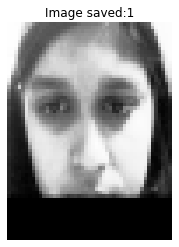

In [13]:
cam = cv2.VideoCapture(0)
#cv2.namedWindow("Face", cv2.WINDOW_AUTOSIZE)
folder = "user/"+input('Person:').lower()


if not os.path.exists(folder):
    os.mkdir(folder)
    
    flag_start_capturing = False
    sample=1
   
    cv2.namedWindow("Face", cv2.WINDOW_NORMAL)

    while True:
        ret,frame = cam.read()
        gray = gray_scale(frame)
        faces_coord = detect_face(gray)

        if len(faces_coord):
            faces = normalize_faces(gray,faces_coord)
              
            cv2.imwrite(folder + '/' + str(sample)+'.jpg',faces[0])
            plot_show(faces[0],"Image saved:"+str(sample))
            clear_output(wait=True)
            if flag_start_capturing == True:
                sample += 1
            
        draw_rectangle(frame,faces_coord)
        cv2.imshow('Face',frame)
        keypress=cv2.waitKey(1)
        
        if keypress == ord('c'):
            
            if flag_start_capturing == False:
                flag_start_capturing = True
            
        
        if sample >20:
            break
            
        if keypress == ord('q'):
            break

    cam.release()
    cv2.destroyAllWindows()
else:
    print ("This name already exists.")

In [14]:
cam.release()

### Create dataset from sample data

In [15]:
import os
import random
from scipy import ndarray

# image processing library
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

# dictionary of the transformations we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}

folder_path = 'user/vineet/'
num_files_desired = 950

# find all files paths from the folder
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

num_generated_files = 0
while num_generated_files <= num_files_desired:
    # random image from the folder
    image_path = random.choice(images)
    # read image as an two dimensional array of pixels
    image_to_transform = sk.io.imread(image_path)
    # random num of transformation to apply
    num_transformations_to_apply = random.randint(1, len(available_transformations))

    num_transformations = 0
    transformed_image = None
    while num_transformations <= num_transformations_to_apply:
        # random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        transformed_image = available_transformations[key](image_to_transform)
        num_transformations += 1

    new_file_path = '%s/augmented_image_%s.jpg' % (folder_path, num_generated_files)

    # write image to the disk
    io.imsave(new_file_path, transformed_image)
    num_generated_files += 1

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'user/vineet/'

### Create dataset for unknown people

In [18]:
### datasets for other class

basepath = "C:\Users\lenovo\scikit_learn_data\lfw_home\lfw_funneled"
#C:\Users\Vineet\scikit_learn_data\lfw_home
images = os.listdir(basepath) 
print (len(images))
data = images[:1000]

for i,folder in enumerate(data,start=1):
    
    files=os.listdir(basepath+'\\'+folder)
    for k,img in enumerate(files,start=1):
        if img.endswith('.jpg'):
            #print img
            frame=cv2.imread(basepath+'\\'+folder+'\\'+img,0)
        #print frame
       
            faces_coord = detect_face(frame)
            if len(faces_coord):
                faces = cut_faces(frame, faces_coord)
                #print faces
                faces = normalize_intensity(faces)
                faces = resize(faces)
                cv2.imwrite('user/unknown/' + str(i)+'.jpg',faces[0])
                
                break

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-18-fd204c6b9f2b>, line 3)

### collect dataset

In [19]:
def collect_dataset():
    images = []
    labels = []
    labels_dic = {}
   
    people = [person for person in os.listdir("user/")]
   
    for i, person in enumerate(people):
        labels_dic[i] = person
        for image in os.listdir("user/" + person):
            if image.endswith('.jpg'):
                images.append(cv2.imread("user/" + person + '/' + image, 0))
                labels.append(i)
    return (images, np.array(labels), labels_dic)

In [20]:
images, labels, labels_dic = collect_dataset()

In [21]:
print (len(images))
print (labels_dic)

409
{0: 'ankit yadav', 1: 'suhani', 2: 'unknown'}


In [22]:
np.bincount(labels)

array([  0,   1, 408], dtype=int64)

In [23]:
images[0].shape

(62, 47)

In [24]:
X_train=np.asarray(images)

In [25]:
type(X_train)
X_train.shape

(409, 62, 47)

In [26]:
train=X_train.reshape(len(X_train),-1)

In [27]:
train.shape

(409, 2914)

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(train.astype(np.float64))

In [30]:
pca1 = PCA(n_components=.97)
new_train=pca1.fit_transform(X_train_sc)

In [31]:
pca1.n_components_

205

In [32]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.linear_model import SGDClassifier

In [33]:
#param = {'C':[.001,.01,.1,1,10],'penalty':['l2','l1']}
param = {"penalty": ["none", "l1", "l2"],
         'eta0':[.001,.01,.1,10]}

In [34]:
gd = GridSearchCV(SGDClassifier(max_iter=2000,loss='log',early_stopping=True),
                  param_grid=param,cv=5,scoring='accuracy')

In [44]:
gd.fit(new_train,labels)

In [45]:
gd.best_score_

In [46]:
gd.best_params_

In [47]:
clf2 = gd.best_estimator_

In [68]:
filename = 'sgd_face.pkl'
f=open(filename, 'wb')
pickle.dump(clf2,f)
 

f.close()

In [69]:
filename = 'sgd_face.pkl'


svc1= pickle.load(open(filename, 'rb'))

In [70]:
svc1

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=2000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
gd.fit(new_train,labels)

C:\Users\Ankit Yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ankit Yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: The number of classes has to be greater than one; got 1 class

In [71]:
cam = cv2.VideoCapture(0)
font=cv2.FONT_HERSHEY_PLAIN
cv2.namedWindow("opencv_face", cv2.WINDOW_AUTOSIZE)



while True:
    ret,frame = cam.read()
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces_coord = detect_face(gray) # detect more than one face
    if len(faces_coord):
        faces = normalize_faces(gray, faces_coord)
        #faces = normalize_intensity(faces)
        for i, face in enumerate(faces): # for each detected face
            
            
            #cv2.imwrite('trainingData/female/picture_BGR5.jpg',face)
            t=face.reshape(1,-1)
            t=sc.transform(t.astype(np.float64))
            test = pca1.transform(t)    
            #print test
            #transform = test.reshape(1,-1)
            #print transform
            prob=svc1.predict_proba(test)
            confidence = svc1.decision_function(test)
            print (confidence)
            print (prob)
           
            
            
            pred = svc1.predict(test)
            print (pred,pred[0])
           
            name=labels_dic[pred[0]].capitalize()
            print (name)
           
           
            if prob[0][1]>.9:
                
                cv2.putText(frame, 'vineet',(faces_coord[i][0], faces_coord[i][1] - 10),
                            cv2.FONT_HERSHEY_PLAIN, 2, (66, 53, 243), 2)
            
                
            elif prob[0][0]>.9:
                cv2.putText(frame,'unknown',(faces_coord[i][0], faces_coord[i][1] - 10),
                            cv2.FONT_HERSHEY_PLAIN, 3, (66, 53, 243), 2)
                
                
           
        clear_output(wait = True)
        draw_rectangle(frame, faces_coord) # rectangle around face
        
    cv2.putText(frame, "ESC to exit", (5, frame.shape[0] - 5),cv2.FONT_HERSHEY_PLAIN, 1.3, (66, 53, 243), 2,cv2.LINE_AA)
    
    cv2.imshow("opencv_face", frame) # live feed in external
    if cv2.waitKey(5) == 27:
        break
        
cam.release()
cv2.destroyAllWindows()
        

[290.93771887]
[[0. 1.]]
[1] 1
Vineet


In [ ]:
cam.release()